## REGULARIZATION TECHNIQUES IN DEEP LEARNING

#### (REPORT AT THE END OF PDF)

#### 1. Objective: Using different strength values for reguralization and finding the optimal one.
#### 2. Dataset Used: CIFAR - 10 Inbuilt Dataset.
#### Contains 60,000 Images with 10 Labels

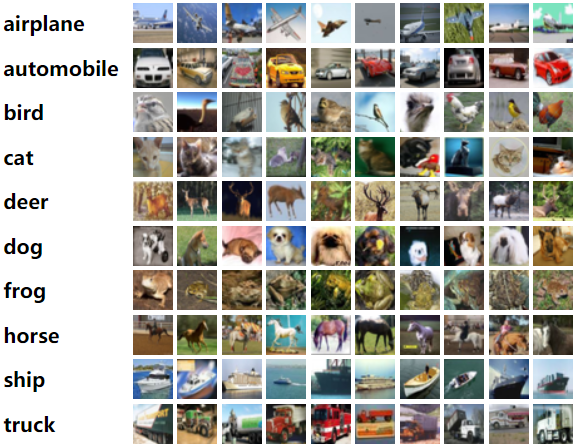

## Importing Necessary Libraries

In [ ]:
import tensorflow as tf

## Loading the Inbuilt - CIFAR - 10 dataset

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


## Shape of the dataset

In [ ]:
print(x_train.shape, y_train.shape)  # 32X32 pixels (50,000 in training)

(50000, 32, 32, 3) (50000, 1)


In [ ]:
print(x_test.shape, y_test.shape)    # 32x32 pixels (10,000 in testing)

(10000, 32, 32, 3) (10000, 1)


#### There are total 60,000 Images in the dataset.

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
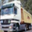

In [ ]:
x_train[1]

##### Here, x_train contains the set of images

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

#### Here, y_train contains the labels of images from 0 to 9

## Plotting the Images

[0]


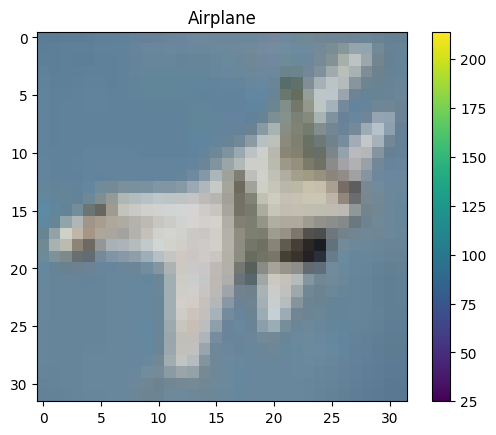

In [ ]:
image_index = 10

image = x_test[image_index]
label = y_test[image_index]

category_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

print(label)
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image)
plt.title(category_names[label[0]])
plt.colorbar()
plt.grid(False)
plt.show()

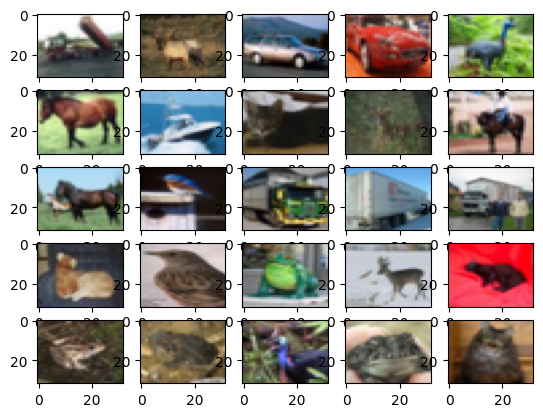

In [ ]:
fig, ax = plt.subplots(5, 5)
k = 2
for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1
plt.show()

## Normalization of Images

#### Normalization in deep learning (DL) is the process of transforming data into a standard scale, usually between 0 and 1.

In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

## Intentionally Reducing Training Data to Induce Overfitting for Regularization Demonstration

### 1. By using a smaller subset of the training data, intentionally creating a scenario where the model is more likely to memorize the training data, leading to overfitting.
### 2. This approach will allow to clearly demonstrate the impact of regularization techniques like L1 and L2, which are designed to mitigate overfitting and improve generalization to unseen data.

In [ ]:
# Use a smaller subset of the training data to intentionally create overfitting
x_train_small = x_train[:20000]  # Using only 20,000 samples
y_train_small = y_train[:20000]

### This step has been done to intentionally introduce overfitting as to demonstrate the impact of reguralization on the dataset.

In [ ]:
print(x_train_small.shape, y_train_small.shape)

(20000, 32, 32, 3) (20000, 1)


In [ ]:
print(x_test.shape, y_test.shape)

(10000, 32, 32, 3) (10000, 1)


## Creating a Simple CNN Model (Without Regularization)

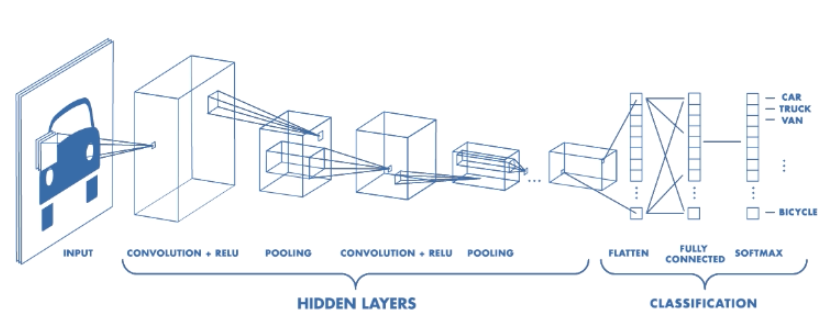

In [ ]:
from tensorflow.keras import layers, models, regularizers

def create_model():

    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # 32 filters, size of filter is 3x3
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))   # relu (1, 0)

    model.add(layers.MaxPooling2D((2, 2)))                    # POOLING LAYER HAS SIZE OF 2x2

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    model.add(layers.Flatten())                               # Converts to 1D

    model.add(layers.Dense(64, activation='relu'))            # 64 neurons in hidden layer
    model.add(layers.Dense(10, activation='softmax'))         # softmax for multiclass classification (probabilities)
    return model

model = create_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',           ### reducing the loss
              loss='sparse_categorical_crossentropy',   # how well the predicted probabilities match the actual class
              metrics=['accuracy'])

In [ ]:
# Train the model to overfit
history = model.fit(x_train_small, y_train_small, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3190 - loss: 1.8496 - val_accuracy: 0.5088 - val_loss: 1.3549
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5789 - loss: 1.2110 - val_accuracy: 0.6081 - val_loss: 1.1155
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6562 - loss: 0.9822 - val_accuracy: 0.6296 - val_loss: 1.0818
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7123 - loss: 0.8124 - val_accuracy: 0.6538 - val_loss: 0.9923
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7646 - loss: 0.6714 - val_accuracy: 0.6402 - val_loss: 1.1086
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8240 - loss: 0.5083 - val_accuracy: 0.6569 - val_loss: 1.0664
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8666 - loss: 0.3954 - val_accuracy: 0.6478 - val_loss: 1.2308
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9111 - loss: 0.2696 - val_accuracy: 0

In [ ]:
import pandas as pd

# Evaluate on training data
train_loss, train_acc = model.evaluate(x_train_small, y_train_small, verbose=0)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Accuracy': [train_acc, test_acc],
    'Loss': [train_loss, test_loss]
})
print(results)

    Dataset  Accuracy      Loss
0  Training   0.99395  0.018560
1      Test   0.62120  4.355415


### Here, we can clearly see that Training accuracy is high compared to the test & Training loss is less as compared to Test Loss. This clearly indicates that our model is Overfitting.

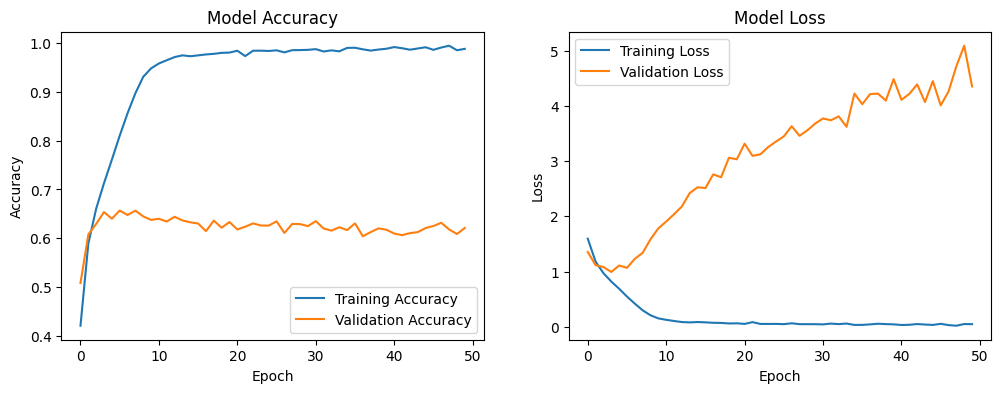

In [ ]:
# Plot training & validation accuracy/loss values to visualize overfitting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## REGULARIZATION

### Regularization is a technique used in machine learning to prevent overfitting, which happens when a model learns the noise in the data rather than the actual patterns.

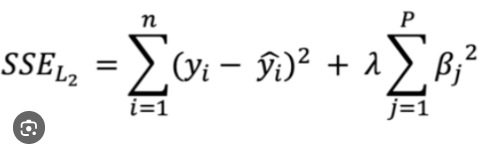

## RIDGE REGULARIZATION (L2)

#### Ridge regularization adds a penalty to the loss function (which the model tries to minimize) that is proportional to the sum of the squared values of the model's coefficients. This penalty discourages the model from having large coefficients.



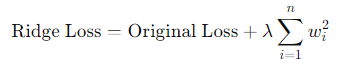

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

## Function for creating a simple network

In [ ]:
def create_model_with_custom_ridge(ridge_strength):

    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3),
                            activation='relu',
                            input_shape=(32, 32, 3),
                            kernel_regularizer=tf.keras.regularizers.l2(ridge_strength)))    # Conv 2D Layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(ridge_strength)))


    model.add(layers.MaxPooling2D((2, 2)))     # Max Pooling Layer

    model.add(layers.Conv2D(64, (3, 3), activation='relu',
                            kernel_regularizer=tf.keras.regularizers.l2(ridge_strength)))   # Conv 2D Layer

    model.add(layers.Flatten())                # Flatten Layer

    model.add(layers.Dense(64, activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(ridge_strength)))  # Dense Layers

    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))


    return model

## Function for trying different Strengths values

In [ ]:
def find_optimal_ridge(x_train, y_train, x_test, y_test, ridge_strengths):

    best_strength = None
    best_accuracy = 0
    best_history = None

    for strength in ridge_strengths:
        print(f"Testing Ridge strength: {strength}")

        model = create_model_with_custom_ridge(strength)    # calling the function

        model.compile(optimizer='adam',                           # Model Compilling
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])


        history = model.fit(x_train, y_train,                      # Model Training
                            epochs=50,
                            validation_data=(x_test, y_test),
                            verbose=1)                             # Verbose = 1, output can be visible


        val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=1)   # evaluating

        print(f"Validation accuracy: {val_accuracy}")

        if val_accuracy > best_accuracy:                           # finding the best accuracy
            best_accuracy = val_accuracy
            best_strength = strength
            best_history = history

    print(f"Optimal Ridge strength: {best_strength} with validation accuracy: {best_accuracy}")
    return best_strength, best_history

In [ ]:
ridge_strengths = [0.0001, 0.0003, 0.001, 0.01, 0.1]  # range of strength values

best_strength, best_history = find_optimal_ridge(x_train_small, y_train_small, x_test, y_test, ridge_strengths)

Testing Ridge strength: 0.0001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2262 - loss: 2.0710 - val_accuracy: 0.4348 - val_loss: 1.5685
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3846 - loss: 1.6926 - val_accuracy: 0.5102 - val_loss: 1.4451
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4246 - loss: 1.5731 - val_accuracy: 0.5331 - val_loss: 1.3264
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4750 - loss: 1.4639 - val_accuracy: 0.5607 - val_loss: 1.3047
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5180 - loss: 1.3761 - val_accuracy: 0.5848 - val_loss: 1.2328
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5317 - loss: 1.3234 - val_accuracy: 0.5974 - val_loss: 1.1900
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5585 - loss: 1.2553 - val_accuracy: 0.6106 - val_loss: 1.1664
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5804 - loss: 1.2180 - val_accuracy: 0.

In [ ]:
print(best_strength)

0.0003


### Here, outoff many strength values (0.0001, 0.001, 0.01, 0.1, 0.0003) 0.0003 had the maximum validation accuracy and low validation loss compared to the network with no regularization.

## Graphs (Accuracy & Loss)

In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plotting accuracy
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

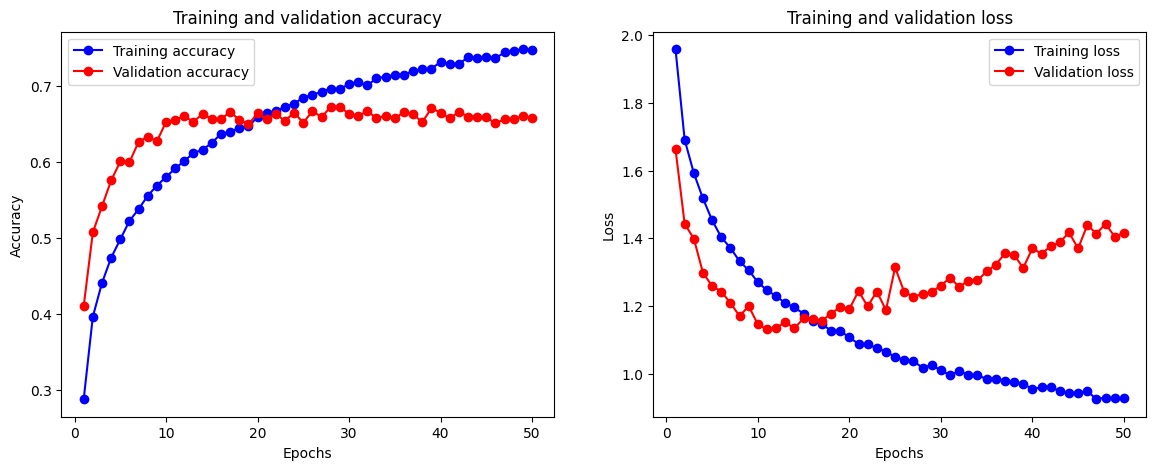

In [ ]:
plot_training_history(best_history)

### Result:
#### The L2 regularization strength of 0.0003 was the best choice because it achieved a balance between reducing overfitting and maintaining generalization.
#### Without regularization, the model showed significant overfitting, with a high training accuracy of 98.59% but poor validation accuracy of 62.12% and a high validation loss.
#### When applying L2 regularization with a strength of 0.0003, the model's validation accuracy improved to 65.79%, indicating better generalization to unseen data.
#### The L2 penalty helped prevent the model from becoming too complex, which mitigated overfitting and led to a more reliable model performance.

## LASSO REGULARIZATION (L1)

### The Lasso regularization term adds the sum of the absolute values of the coefficients to the loss function.

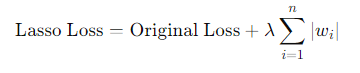

## Function for creating a simple network

In [ ]:
# Define the function to create your model with customizable L1 regularization strength
def create_model_with_custom_l1(l1_strength):


    model = models.Sequential()


    model.add(layers.Conv2D(32, (3, 3),
                            activation='relu',
                            input_shape=(32, 32, 3),
                            kernel_regularizer=tf.keras.regularizers.l1(l1_strength)))    # Conv 2D Layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l1(l1_strength)))


    model.add(layers.MaxPooling2D((2, 2)))     # Max Pooling Layer (2D)

    model.add(layers.Conv2D(64, (3, 3), activation='relu',
                            kernel_regularizer=tf.keras.regularizers.l1(l1_strength)))  # Conv 2D


    model.add(layers.Flatten())                # Flattening Layer (2D TO 1D)


    model.add(layers.Dense(64, activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l1(l1_strength)))   # Dense Layers
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    return model

## Function for trying different strength values

In [ ]:
# Function to train and evaluate the model with different L1 strengths
def find_optimal_l1(x_train, y_train, x_test, y_test, l1_strengths):


    best_strength = None
    best_accuracy = 0
    best_history = None


    for strength in l1_strengths:
        print(f"Testing L1 strength: {strength}")


        model = create_model_with_custom_l1(strength)    # calling the function

        model.compile(optimizer='adam',                          # Model Compilling
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])                      # metric is accuracy


        history = model.fit(x_train, y_train,              # Training the model
                            epochs=50,
                            validation_data=(x_test, y_test),
                            verbose=1)


        val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=1)  # Model Evaluation


        print(f"Validation accuracy: {val_accuracy}")

        if val_accuracy > best_accuracy:                                  # Finding the best accuracy
            best_accuracy = val_accuracy
            best_strength = strength
            best_history = history

    print(f"Optimal L1 strength: {best_strength} with validation accuracy: {best_accuracy}")
    return best_strength, best_history

In [ ]:
l1_strengths = [0.0001, 0.001, 0.01, 0.1]       # range of strength values

best_strength, best_history = find_optimal_l1(x_train_small, y_train_small, x_test, y_test, l1_strengths)

Testing L1 strength: 0.0001
Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1800 - loss: 2.4365 - val_accuracy: 0.3815 - val_loss: 1.8690
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3131 - loss: 1.9411 - val_accuracy: 0.4396 - val_loss: 1.6519
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3672 - loss: 1.8113 - val_accuracy: 0.4546 - val_loss: 1.6448
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3981 - loss: 1.7335 - val_accuracy: 0.4880 - val_loss: 1.5565
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4233 - loss: 1.6820 - val_accuracy: 0.5044 - val_loss: 1.4991
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4322 - loss: 1.6530 - val_accuracy: 0.5275 - val_loss: 1.4604
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4437 - loss: 1.6408 - val_accuracy: 0.5287 - val_loss: 1.4994
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4563 - los

### Best Optimum Value for Lasso is 0.0001

## Trying with a different value :

In [ ]:
l1_strengths = [0.00001]

best_strength, best_history = find_optimal_l1(x_train_small, y_train_small, x_test, y_test, l1_strengths)

Testing L1 strength: 1e-05
Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.2270 - loss: 2.1132 - val_accuracy: 0.4515 - val_loss: 1.5934
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4041 - loss: 1.6642 - val_accuracy: 0.5155 - val_loss: 1.4139
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4797 - loss: 1.4994 - val_accuracy: 0.5334 - val_loss: 1.3642
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5000 - loss: 1.4143 - val_accuracy: 0.5888 - val_loss: 1.2006
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5545 - loss: 1.3089 - val_accuracy: 0.5831 - val_loss: 1.2421
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5625 - loss: 1.2590 - val_accuracy: 0.6117 - val_loss: 1.1732
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5849 - loss: 1.2182 - val_accuracy: 0.6149 - val_loss: 1.1975
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6057 - loss

## Function to plot Graphs (Accuracy & Loss)

In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plotting accuracy
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

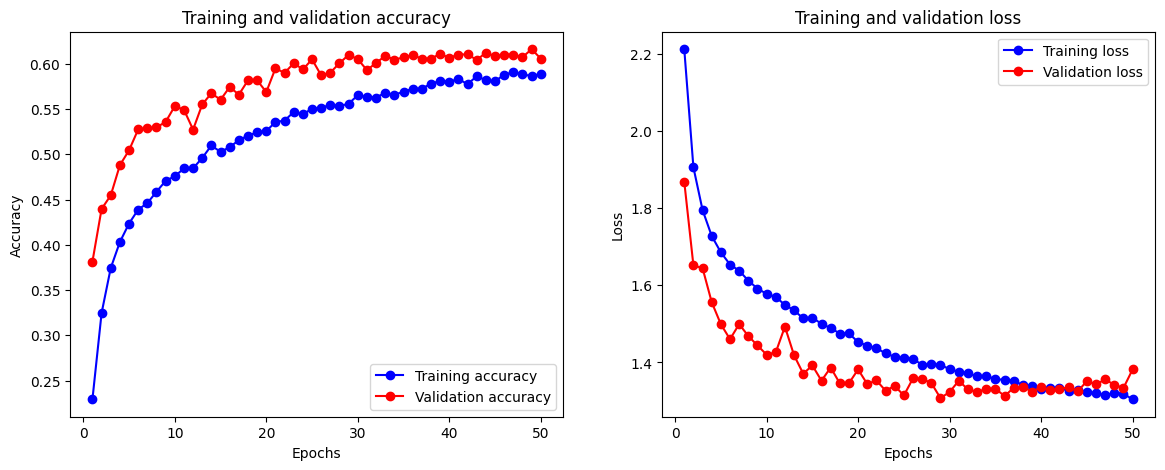

In [ ]:
plot_training_history(best_history)

### RESULTS:
### The L1 regularization resulted in a model with better generalization compared to the non-regularized version. With L1 regularization, the model achieved a validation accuracy of 64.90%, which is an improvement over the non-regularized model's validation accuracy of 62.12%.
### Although the training accuracy was lower at 86.13% compared to the non-regularized model, the L1 regularization successfully reduced the model's complexity, leading to a more balanced performance on the validation set.

# Report (Regularization Techniques):
## Objective:
### To demonstrate the effects of overfitting and the impact of regularization, I used the CIFAR-10 dataset, intentionally training on only 20,000 images and testing on 10,000 images.

## Methodology:
### Overfitting: The reduced dataset size led to overfitting, as the model had enough capacity to memorize the limited training data.
### Regularization Techniques:
### 1. Lasso (L1): Applied to encourage sparsity by pushing some model weights to zero.
### 2. Ridge (L2): Applied to penalize large weights, thereby reducing model complexity.

## Impact:
### Lasso (L1): Tested strengths ranging from 0.00001 to 0.1. The strength of 0.00001 provided the best trade-off between training performance and generalization, slightly reducing overfitting without overly simplifying the model.
### Ridge (L2): Tested strengths from 0.0001 to 0.1. The strength of 0.0003 was optimal, reducing the validation loss and improving accuracy by controlling the magnitude of the weights.

## Results:
### Without Regularization: The model achieved high training accuracy but poor validation accuracy, indicating significant overfitting.
### With Lasso (L1, 0.00001): Validation accuracy improved, showing better generalization while still retaining important features.
### With Ridge (L2, 0.0003): Validation accuracy further improved, indicating a well-balanced model with reduced overfitting.

## Conclusion:
### Regularization was key in improving the model's generalization. Lasso at 0.00001 and Ridge at 0.0003 were the most effective strengths, demonstrating that careful tuning of regularization can significantly enhance model performance when overfitting is a concern.